# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os
import requests
import tweepy


In [2]:
# read the twitter archive data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#create file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#Import the tweet image predictions TSV file into a DataFrame
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
## These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

## NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
## df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
## change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
## NOTE TO REVIEWER: this student had mobile verification issues so the following
## Twitter API code was sent to this student from a Udacity instructor
## Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
 #       count += 1
 #       print(str(count) + ": " + str(tweet_id))
  #      try:
   #         tweet = api.get_status(tweet_id, tweet_mode='extended')
   #         print("Success")
    #        json.dump(tweet._json, outfile)
     #       outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [5]:
# Read the .txt file line by line into a list of dictionaries
twitter_list =[]
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})

# Convert the list of dictionaries to a pandas DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count']) 



## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter archive

**twitter_archive columns and their description:**

tweet_id: the unique identifier for each of the tweet

in_reply_to_status_id: the status id for the reply given to the tweet id

in_reply_to_user_id: the status id for the reply given to the tweet id ( w.r.t user id)

timestamp: Date and time the tweet was created, in Excel-friendly format.

source: the web link as source

text: the corresponding tweets text

retweeted_status_id: the status id for the reply given to the tweet id i.e., for the retweeted id

retweeted_status_user_id: the status id for the reply given to the tweet id ( w.r.t user id) i.e., for the retweeted id

retweeted_status_timestamp: Date and time the tweet was created, in Excel-friendly format.

expanded_urls: Expanded version of url1; URL entered by user and displayed in Twitter. Note that the user-entered URL may 

itself be a shortened URL, e.g. from bit.ly.

rating_numerator: the ranking given by the user

rating_denominator: The reference ranking given by the user

name: the breed or dog's name

doggo, floofer, pupper, puppo -- The stage of the dog

the link to the twitter data columns description can be found here

In [6]:
# First five rows of the data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
# Last five rows of the data
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
# Shape of the data
twitter_archive.shape

(2356, 17)

> this data has 17 columns and 2356 entries

In [9]:
# Understanding the data types
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> Some columns like timestamp, are in the wrong data format

In [10]:
# descriptive statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# Check for missing values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> 6 columns have missing values

> most of the data for columns for retweeted entries, are empty. This shows that of 2356 total entries, 2175 were not retweeted.

In [12]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
# checking to see if the dog breed columns are filled with non-None at the same time
twitter_archive.sort_values(by = 'doggo', ascending = False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
780,775733305207554048,NaN,NaN,2016-09-13 16:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anakin. He strives to reach his full d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo,None,None,None
429,821107785811234820,NaN,NaN,2017-01-16 21:32:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who looks like he's about to gi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821107785...,11,10,None,doggo,None,None,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
782,775364825476165632,NaN,NaN,2016-09-12 16:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. He's an independent doggo stil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775364825...,11,10,Finley,doggo,None,None,None
1051,742534281772302336,NaN,NaN,2016-06-14 01:49:03 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","For anyone who's wondering, this is what happe...",NaN,NaN,NaN,https://vine.co/v/iLTZmtE1FTB,11,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [17]:
twitter_archive.sort_values(by = 'puppo', ascending = False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1035,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,None,None,None,puppo
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
701,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,13,10,None,None,None,None,puppo
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
736,780931614150983680,NaN,NaN,2016-09-28 00:46:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo
947,752519690950500352,NaN,NaN,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752519690...,11,10,None,None,None,None,puppo
922,756275833623502848,NaN,NaN,2016-07-21 23:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When ur older siblings get to play in the deep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756275833...,10,10,None,None,None,None,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
663,790946055508652032,NaN,NaN,2016-10-25 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Betty. She's assisting with the dishes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,None,None,None,puppo


In [18]:
twitter_archive.sort_values(by = 'floofer', ascending = False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,None,None,floofer,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


> a maximum of one colum depicting dog breed, are not None at a time

In [19]:
twitter_archive.tweet_id.duplicated().sum()

0

> there were no duplicate entries

In [20]:
#identify the rating with 0
twitter_archive[twitter_archive['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


A rating denominator of zero means there was no rate criteria

In [21]:
# checking for names filled with None
twitter_archive[twitter_archive['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


> Some names are filled with 'None'

### Twitter_data

**twitter_data columns and their description:**

**tweet_id:** the unique identifier for each of the tweet

**retweet_count:** Number of times it was retweeted

**favorite_count:** Number of times it was marked as favorite

In [22]:
# First five rows
twitter_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [23]:
twitter_data.shape

(2354, 3)

> there are 3 columns and 2354 rows in the dataset

In [24]:
# data types
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [25]:
twitter_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

> there are no missing values

In [26]:
twitter_data.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Image Prediction

**Image_Prediction columns and their description:**

* **tweet_id:** the unique identifier for each of the tweet

* **jpg_url:** Image link or URL

* **Img_num:** Image number

* **p1:** p1 is the algorithm's #1 prediction for the image in the tweet

* **p1_conf:** p1_conf is how confident the algorithm is in its #1 prediction

* **p1_dog:** p1_dog is whether or not the #1 prediction is a breed of dog

* **p2:** is the algorithm's second most likely prediction

* **p2_conf:** is how confident the algorithm is in its #2 prediction

* **p2_dog:** is whether or not the #2 prediction is a breed of dog

* **p3:** p3 is the algorithm's #3 prediction for the image in the tweet 

* **p3_conf:** p3_conf is how confident the algorithm is in its #3 prediction

* **p3_dog:** p3_dog is whether or not the #3 prediction is a breed of dog

In [27]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:

image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

> There are no missing values

### Quality issues
#### Twitter archive

1. 181 entries are retweeted

2. timestamp and retweeted_status_timestamp should both be in datetime format

3. Missing values in name column, represented as 'None'

4. A total of 6 columns had missing values

5. There is an entry where denominator reads 0

6. The following columns should be integers and not float:
    * in_reply_to_status_id, 
    * in_reply_to_user_id, 
    * timestamp, 
    * retweeted_status_id, 
    * retweeted_status_user_id, and
    * retweeted_status_timestamp 
    
7. Tweet_id data type should be object not integer  


#### Image prediction
8. Tweet_id data type should be object not integer



### Tidiness issues
1. The columns 'doggo', 'floofer', 'pupper', and 'puppo'all represent dog stages and could be merged as one.

2. Twitter_data and Image_prediction can be merged with the twitter_archive dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Make copies of original pieces of data
tarchive_clean = twitter_archive.copy()
tdata_clean = twitter_data.copy()
imagep_clean = image_prediction.copy()

In [31]:
tarchive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [32]:
tdata_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [33]:
imagep_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality Issue #1:

#### Define:

Twitter Archive: 181 entries are retweets

#### Code

In [34]:
# Delete retweets by filtering out values that were not null in retweeted_status_user_id column
tarchive_clean = tarchive_clean[pd.isnull(tarchive_clean['retweeted_status_user_id'])]

#### Test

In [35]:
print(sum(tarchive_clean.retweeted_status_user_id.value_counts()))

0


### Quality Issue #2:

#### Define

Twitter archive: timestamp and retweeted_status_timestamp should both be in datetime format

#### Code

In [36]:
# convert timestamp and retweeted_status_timestamp to datetime
tarchive_clean['timestamp'] = pd.to_datetime(tarchive_clean['timestamp'])
tarchive_clean['retweeted_status_timestamp'] = pd.to_datetime(tarchive_clean['retweeted_status_timestamp'])


#### Test

In [37]:
tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns]

### Quality Issue #3:

#### Define

Twitter archive: A total of 6 columns had missing values

#### Code

In [38]:
tarchive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [39]:
# deleting all columns with missing values as they would not be used in analysis
tarchive_clean.drop(['in_reply_to_status_id', 
                     'in_reply_to_user_id', 
                     'retweeted_status_id', 
                     'retweeted_status_user_id', 
                     'retweeted_status_timestamp', 
                     'expanded_urls'], 
                    axis =1, inplace = True)

#### Test

In [40]:
tarchive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Quality Issue #4:

#### Define

Twitter archive: missing values in name column represented as 'None'

#### Code

In [41]:
tarchive_clean.shape

(2175, 11)

In [42]:
tarchive_clean = tarchive_clean[tarchive_clean['name'] != 'None']

#### Test

In [43]:
tarchive_clean[tarchive_clean['name'] == 'None']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
tarchive_clean.shape

(1495, 11)

### Quality Issue #5:

#### Define

twitter archive: there is an observation with rating_denominator of 0

#### Code

In [45]:
# Filter out rows with rating_denominator = 0
tarchive_clean = tarchive_clean[tarchive_clean['rating_denominator'] != 0]

#### Test

In [46]:
tarchive_clean[tarchive_clean['rating_denominator'] == 0]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #6:

#### Define

The following columns should be integers and not float:
* in_reply_to_status_id,
* in_reply_to_user_id,
* retweeted_status_id,
* retweeted_status_user_id

#### Code

In [47]:
# The columns have already been deleted in #3

#### Test

In [48]:
tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 2354
Data columns (total 11 columns):
tweet_id              1495 non-null int64
timestamp             1495 non-null datetime64[ns]
source                1495 non-null object
text                  1495 non-null object
rating_numerator      1495 non-null int64
rating_denominator    1495 non-null int64
name                  1495 non-null object
doggo                 1495 non-null object
floofer               1495 non-null object
pupper                1495 non-null object
puppo                 1495 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 140.2+ KB


### Quality Issue #7:

#### Define

twitter archive: Tweet_id data type should be object not integer

#### Code

In [49]:
# convert tweet_id to string
tarchive_clean['tweet_id'] = tarchive_clean['tweet_id'].astype(str)

#### Test

In [50]:
tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 2354
Data columns (total 11 columns):
tweet_id              1495 non-null object
timestamp             1495 non-null datetime64[ns]
source                1495 non-null object
text                  1495 non-null object
rating_numerator      1495 non-null int64
rating_denominator    1495 non-null int64
name                  1495 non-null object
doggo                 1495 non-null object
floofer               1495 non-null object
pupper                1495 non-null object
puppo                 1495 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 140.2+ KB


### Quality Issue #8:

#### Define

image prediction: Tweet_id data type should be object not integer

#### Code

In [51]:
# convert tweet_id to string
imagep_clean['tweet_id'] = imagep_clean['tweet_id'].astype(str)

#### Test

In [52]:
imagep_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tidiness Issue #1:

#### Define

The columns 'doggo', 'floofer', 'pupper', and 'puppo'all represent dog stages and could be merged as one.

#### Code

In [53]:
tarchive_clean['all_stages'] = tarchive_clean.doggo + tarchive_clean.floofer + tarchive_clean.pupper + tarchive_clean.puppo

In [54]:
tarchive_clean['all_stages'].value_counts()

NoneNoneNoneNone       1297
NoneNonepupperNone      132
doggoNoneNoneNone        40
NoneNoneNonepuppo        16
NoneflooferNoneNone       5
doggoNonepupperNone       5
Name: all_stages, dtype: int64

In [55]:
# create function to check dog stages
def check_stages(data):
    if data['all_stages'].count('None') == 2:
        return 'Multiple'
    else:
        if data['all_stages'].count('doggo') == 1:
            return 'Doggo'
        elif data['all_stages'].count('floofer') == 1:
            return 'Floofer'
        elif data['all_stages'].count('pupper') == 1:
            return 'Pupper'
        elif data['all_stages'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

In [56]:
tarchive_clean['dog_stage'] = tarchive_clean.apply(check_stages, axis=1)

In [57]:
# drop columns
tarchive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'all_stages'], axis=1, inplace=True)

#### Test

In [58]:
tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 2354
Data columns (total 8 columns):
tweet_id              1495 non-null object
timestamp             1495 non-null datetime64[ns]
source                1495 non-null object
text                  1495 non-null object
rating_numerator      1495 non-null int64
rating_denominator    1495 non-null int64
name                  1495 non-null object
dog_stage             1495 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 105.1+ KB


In [59]:
tarchive_clean['dog_stage'].value_counts()

None        1297
Pupper       132
Doggo         40
Puppo         16
Floofer        5
Multiple       5
Name: dog_stage, dtype: int64

### Tidiness Issue #2:

#### Define

Twitter_data and Image_prediction can be merged with the twitter_archive dataset.

#### Code

In [60]:
# merge  clean twitter api data with the clean twitter archive data
tarchive_clean = pd.merge(left=tarchive_clean, right=tdata_clean, how='left', on='tweet_id')
# merge  clean image prediction data with the just merged data
tarchive_clean = pd.merge(left=tarchive_clean, right=imagep_clean, how='left', on='tweet_id')

#### Test

In [61]:
tarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 1494
Data columns (total 21 columns):
tweet_id              1495 non-null object
timestamp             1495 non-null datetime64[ns]
source                1495 non-null object
text                  1495 non-null object
rating_numerator      1495 non-null int64
rating_denominator    1495 non-null int64
name                  1495 non-null object
dog_stage             1495 non-null object
retweet_count         1495 non-null int64
favorite_count        1495 non-null int64
jpg_url               1448 non-null object
img_num               1448 non-null float64
p1                    1448 non-null object
p1_conf               1448 non-null float64
p1_dog                1448 non-null object
p2                    1448 non-null object
p2_conf               1448 non-null float64
p2_dog                1448 non-null object
p3                    1448 non-null object
p3_conf               1448 non-null float64
p3_dog                144

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
 tarchive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight 1. 
What was the highest source of the tweets?

### Insight 2.
What is the lowest source of the tweets?

In [63]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [64]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 21 columns):
tweet_id              1495 non-null int64
timestamp             1495 non-null object
source                1495 non-null object
text                  1495 non-null object
rating_numerator      1495 non-null int64
rating_denominator    1495 non-null int64
name                  1495 non-null object
dog_stage             1495 non-null object
retweet_count         1495 non-null int64
favorite_count        1495 non-null int64
jpg_url               1448 non-null object
img_num               1448 non-null float64
p1                    1448 non-null object
p1_conf               1448 non-null float64
p1_dog                1448 non-null object
p2                    1448 non-null object
p2_conf               1448 non-null float64
p2_dog                1448 non-null object
p3                    1448 non-null object
p3_conf               1448 non-null float64
p3_dog                1448 non-nul

In [65]:
# Change wrong datatypes
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

In [66]:
twitter_archive_master['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1420
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          45
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       20
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [67]:
#extract values
twitter_archive_master['source'] = twitter_archive_master.source.str.extract('>([\w\W\s]*)<', expand=True)

source = twitter_archive_master['source'].value_counts()
source

Twitter for iPhone     1420
Vine - Make a Scene      45
Twitter Web Client       20
TweetDeck                10
Name: source, dtype: int64

### Visualization

Text(0,0.5,'Number of tweets')

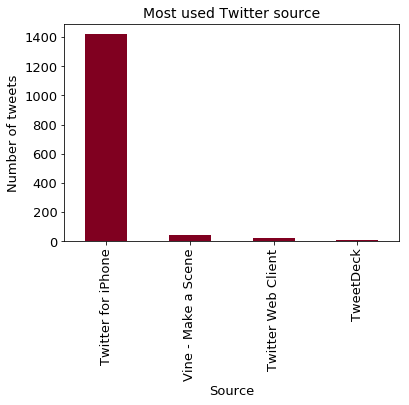

In [68]:
source.plot.bar(color = '#800020', fontsize = 13)
    
plt.title('Most used Twitter source', color = 'black', fontsize = '14')
plt.xlabel('Source', fontsize = '13')
plt.ylabel('Number of tweets', fontsize = '13')

> Most tweets came from Iphone users

### Insight 3
Which dog stage occurred the most?

### Insight 4
Which dog stage least occurred?

In [69]:
stage_data = twitter_archive_master[twitter_archive_master['dog_stage'] != 'None']
stages = stage_data['dog_stage'].value_counts()


In [70]:
stages

Pupper      132
Doggo        40
Puppo        16
Multiple      5
Floofer       5
Name: dog_stage, dtype: int64

Text(0,0.5,'dog stage')

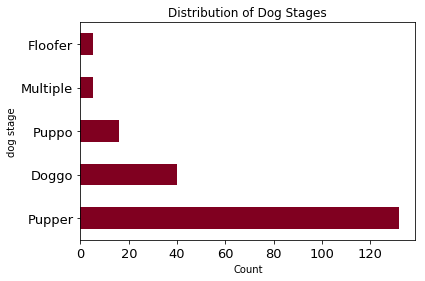

In [71]:
stages.plot.barh(color = '#800020', fontsize = 13)
plt.title('Distribution of Dog Stages')
plt.xlabel('Count')
plt.ylabel('dog stage')

> The most classified dog stage is Pupper

### Insights:
1. Majority of tweets came from people tweeting from Iphone

2. The lowedt number of tweets are from TweetDeck

3. Most occuring dog stage is pupper

4. The least occuring dog stage is Floofer